## Problem 2:  Linear Regression Class

Let's say you want to create Python classes for three related types of linear regression: Ordinary Least Squares Linear Regression, Ridge Regression, and Lasso Regression. 

Consider the multivariate linear model:

$$y = X\beta + \epsilon$$

where $y$ is a length $n$ vector, $X$ is an $m \times p$ matrix, and $\beta$
is a $p$ length vector of coefficients.

#### Ordinary Least Squares Linear Regression

[OLS Regression](https://en.wikipedia.org/wiki/Ordinary_least_squares) seeks to minimize the following cost function:

$$\|y - \beta\mathbf {X}\|^{2}$$

The best fit coefficients can be obtained by:

$$\hat{\beta} = (X^T X)^{-1}X^Ty$$

where $X^T$ is the transpose of the matrix $X$ and $X^{-1}$ is the inverse of the matrix $X$.

#### Ridge Regression

[Ridge Regression](https://en.wikipedia.org/wiki/Tikhonov_regularization) introduces an L2 regularization term to the cost function:

$$\|y - \beta\mathbf {X}\|^{2}+\|\Gamma \beta \|^{2}$$

Where $\Gamma = \alpha I$ for some constant $\alpha$ and the identity matrix $I$.

The best fit coefficients can be obtained by:
$$\hat{\beta} = (X^T X+\Gamma^T\Gamma)^{-1}X^Ty$$

#### Lasso Regression

[Lasso Regression](https://en.wikipedia.org/wiki/Lasso_%28statistics%29) introduces an L1 regularization term and restricts the total number of predictor variables in the model.
The following cost function:
$${\displaystyle \min _{\beta _{0},\beta }\left\{{\frac {1}{m}}\left\|y-\beta _{0}-X\beta \right\|_{2}^{2}\right\}{\text{ subject to }}\|\beta \|_{1}\leq \alpha.}$$

does not have a nice closed form solution. For the sake of this exercise, you may use the [sklearn.linear_model.Lasso](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) class, which uses a coordinate descent algorithm to find the best fit. You should only use the class in the fit() method of this exercise (ie. do not re-use the sklearn for other methods in your class).

#### $R^2$ score

The $R^2$ score is defined as:
$${R^{2} = {1-{SS_E \over SS_T}}}$$

Where:

$$SS_T=\sum_i (y_i-\bar{y})^2, SS_R=\sum_i (\hat{y_i}-\bar{y})^2, SS_E=\sum_i (y_i - \hat{y_i})^2$$

where  ${y_i}$ are the original data values, $\hat{y_i}$ are the predicted values, and $\bar{y_i}$ is the mean of the original data values.

### Part 1:  Base Class
Write a class called `Regression` with the following methods:

$fit(X, y)$: Fits linear model to $X$ and $y$.

$get\_params()$: Returns $\hat{\beta}$ for the fitted model. The parameters should be stored in a dictionary.

$predict(X)$: Predict new values with the fitted model given $X$.

$score(X, y)$: Returns $R^2$ value of the fitted model.

$set\_params()$: Manually set the parameters of the linear model.

This parent class should throw a `NotImplementedError` for methods that are intended to be implemented by subclasses.

In [1]:
class Regression(object):
    
    def __init__(self):
        self.params = dict()
    
    def get_params(self):
        return self.params
    
    def set_params(self, **kwargs):
        for k,v in kwargs.iteritems():
            self.params[k] = v
        
    def fit(self, X, y):
        raise NotImplementedError()
        
    def predict(self, X):
        raise NotImplementedError()
        
    def score(self, X, y):
        raise NotImplementedError()

### Part 2: OLS Linear Regression

Write a class called `OLSRegression` that implements the OLS Regression model described above and inherits the `Regression` class.

In [2]:
class LinearRegression(Regression):
    
    def __init__(self):
        super()
        #super(LinearRegression, self).__init__() # For Python2.7 only
        
    def fit(self, X, y):
        X = np.append(np.ones((X.shape[0], 1)), X, axis=1)
        beta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
        self.params['coef'] = beta[1:]
        self.params['intercept'] = beta[0]
    
    def predict(self, X):
        return np.dot(X, self.params['coef'])+self.params['intercept']

    def score(self, X, y):
        y_hat = self.predict(X)
        y_bar = np.mean(y)
        SST = np.sum((y - y_bar)**2)
        SSRes = np.sum((y_hat - y)**2)
        R2 = 1 - SSRes / SST
        return R2

### Part 3: Ridge Regression

Write a class called `RidgeRegression` that implements Ridge Regression and inherits the `OLSRegression` class.

In [3]:
class RidgeRegression(LinearRegression):
    
    def __init__(self, alpha=0.1):
        super()
        #super(RidgeRegression, self).__init__() # For Python2.7 only
        self.params['alpha'] = alpha

    def fit(self, X, y):
        X = np.append(np.ones((X.shape[0], 1)), X, axis=1)
        C = X.T.dot(X) + self.params['alpha']*np.eye(X.shape[1])
        beta = np.linalg.inv(C).dot(X.T.dot(y))
        self.params['coef'] = beta[1:]
        self.params['intercept'] = beta[0]

### Part 3: Lasso Regression

Write a class called `LassoRegression` that implements Lasso Regression and inherits the `OLSRegression` class. You should only use Lasso(), Lasso.fit(), Lasso.coef_, and Lasso._intercept from the `sklearn.linear_model.Lasso` class.

In [4]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

class LassoRegression(LinearRegression):
    
    def __init__(self, alpha=0.1):
        super(self)
        #super(LassoRegression, self).__init__() # For Python2.7 only
        self.params['alpha'] = alpha

    def fit(self, X, y):
        clf = linear_model.Lasso(alpha=self.params['alpha'])
        clf.fit(X, y)
        self.params['coef'] = clf.coef_
        self.params['intercept'] = clf.intercept_

### Part 4: Model Scoring
You will use the [Boston dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) for this part.

Instantiate each of the three models above.  Using a for loop, fit (on the training data) and score (on the testing data) each model on the Boston dataset.  

Print out the $R^2$ value for each model and the parameters for the best model using the `get_params()` method. Use an $\alpha$ value of 0.1.

**Hint:**  You can consider using the `sklearn.model_selection.train_test_split` method to create the training and test datasets.

In [5]:
import numpy as np
from sklearn import datasets
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

dataset = datasets.load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(dataset['data'], 
                                                    dataset['target'], 
                                                    test_size=0.25, 
                                                    random_state=42)

alpha = 0.1
models = [LinearRegression(),
          RidgeRegression(alpha),
          LassoRegression(alpha)]

for model in models:
    model.fit(X_train, y_train)
    print model.score(X_test, y_test)

0.484908663591
0.491805649761
0.501975882135


### Part 5: Visualize Model Performance

We can evaluate how the models perform for various values of $\alpha$. Calculate the $R^2$ scores for each model for  $\alpha \in [0.05, 1]$ and plot the three lines on the same graph. To change the parameters, use the `set_params()` method. Be sure to label each line and add axis labels.

In [54]:
lines = np.zeros((3, 50, 2))
alpha = 0.1

models = [LinearRegression(),
      RidgeRegression(alpha),
      LassoRegression(alpha)]

for id, alpha in enumerate(np.linspace(0.05, 1, 50)):

    for num, model in enumerate(models):
        model.set_params(alpha=alpha)
        model.fit(X_train, y_train)
        lines[num, id] = [model.score(X_test, y_test), alpha]

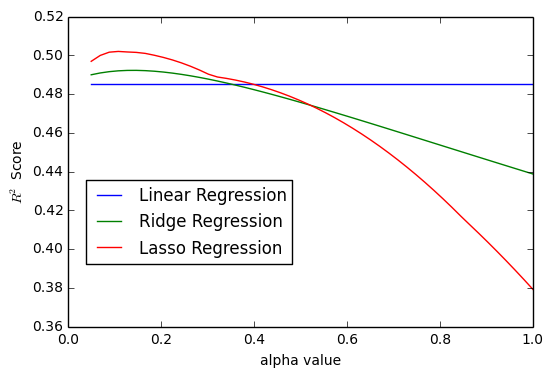

In [61]:
plt.xlabel("alpha value")
plt.ylabel("$R^2$ Score")

for i, line in enumerate(lines):
    plt.plot(line[:,1], line[:,0])
plt.legend(["Linear Regression", "Ridge Regression", "Lasso Regression"], bbox_to_anchor=(0.5, 0.5))
plt.show()